In [1]:
import numpy as np
import ephem
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import datetime
import pandas as pd
import scipy as sp
import scipy.signal as sig
import scipy.interpolate as interp
from imp import reload
import tempychart as tp

In [2]:
timezone_name = 'US/Eastern'
tempfile = './noaa_data/hanover/hourlytemps.csv'
precipfile = './noaa_data/hanover/dailyprecip.csv'
chart_title = 'Hanover'
savename = './charts/Hanover.png'

lat='43.7022'
lon='-72.2896'
elevation=528



In [3]:
sunrise, sunset = tp.get_sunriseset(lat,lon,elevation, timezone_name)
temps = tp.load_hourlytemps_computed(tempfile)
precip, snow = tp.import_daily_precip_computed(precipfile)

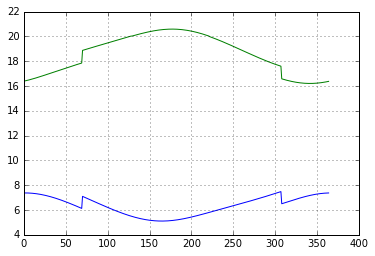

In [4]:
plt.plot(sunrise)
plt.plot(sunset)
plt.grid()

In [5]:
##### functions for reading in from raw data
# tempfile_raw = './noaa_data/hanover/lebanondat.txt'

# df = tp.read_SGHDtemps_to_dataframe(tempfile_raw,timezone_name)
# temps = tp.convert_SGHDdf_to_avghourlytemp(df)
# tp.store_hourlytemps_as_csv(temps,tempfile)

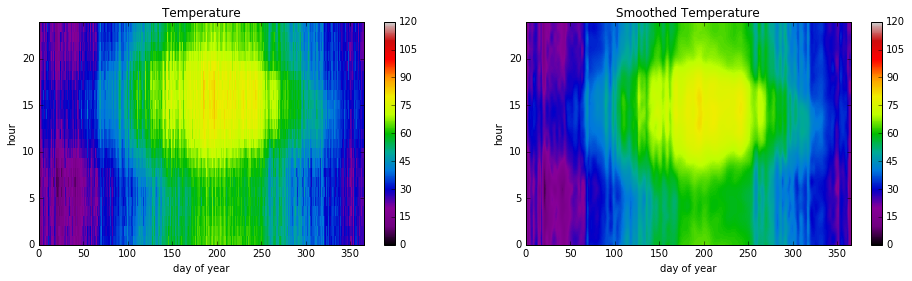

In [6]:
temp_smooth = tp.smooth_temps(temps, plot=True, s=5e5)

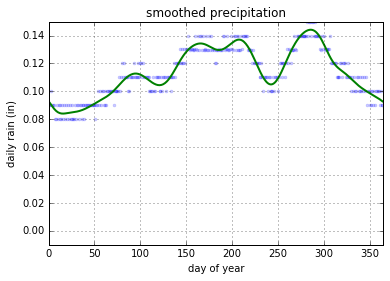

In [7]:
precip_smooth = tp.smooth_precip(precip, plot=True,s=0.01)

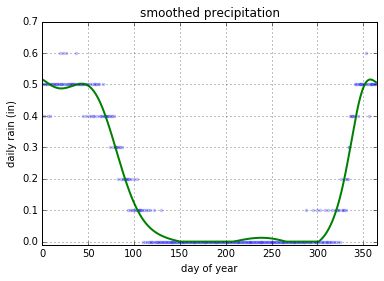

In [8]:
snow_smooth = tp.smooth_precip(snow, plot=True,s=0.8, dx=60)

In [9]:
reload(tp)

<module 'tempychart' from '/Users/nknezek/code/sunchart/tempychart.py'>

In [10]:
tp.plot_tempychart(precip_smooth, temp_smooth, sunrise, sunset, chart_title, savename=savename, snow=snow_smooth)
